# Datan analysointi K2019 - kerta 8

<a href="#1">Lineaarinen regressio</a>  
<a href="#2">Usean selittävän muuttujan regressio</a>  
<a href="#3">Koneoppiminen</a>  
<a href="#4">Puuttuvien arvojen käsittely</a>  
<a href="#5">Tekstikentät numeerisiksi</a>  
<a href="#6">Jako opetus- ja testidataan</a>  
<a href="#7">Muuttujien muunnokset</a>  
<a href="#8">Muuttujien valinta</a>  


<a id="1"></a>
## Lineaarinen regressio
Kahden määrällisen muuttujan riippuvuutta voidaan havainnollistaa **hajontakaavion** avulla. Lisäksi voidaan laskea lineaarisen riippuvuuden voimakkuutta mittaava korrelaatiokerroin. Näitä tehtiin 6. kerralla.

Jos halutaan selvittää tarkemmin riippuvuuden luonnetta tai hyödyntää riippuvuutta ennustamistarkoituksiin, niin riippuvuutta voidaan mallintaa  **lineaarisen regressiomallin** avulla.

Tässä pyritään arvioimaan **vastemuuttujan eli selitettävän muuttujan y**  lineaarista riippuvuutta **selittävistä muuttujista X**. Selittäviä muuttujia voi olla useampia, mutta tutkitaan ensin teoriaa yhden selittävän muuttujan osalta.

Yksinkertaistettuna lineaarisessa regressiossa pyritään löytämään suoralle *y* = *kx* + *b* parametrit *k* (kulmakerroin) ja *b* (vakiotermi) niin, että havaintopisteet (x,y) olisivat "mahdollisimman lähellä" suoraa. Parametrit valitaan **pienimmän neliösumman menetelmällä** eli verrataan todellisten y:n arvojen eroa suoran *y* = *kx* + *b* antamiin y:n arvoihin ja valitaan *k* ja *b* siten, että erojen neliöiden summa on mahdollisimman pieni.

![kuva](https://upload.wikimedia.org/wikipedia/commons/thumb/b/be/Normdist_regression.png/300px-Normdist_regression.png)


Lineaarisen regressioanalyysin tekemiseen tarvitaan jotain koneoppimisen/mallinnuksen kirjastoa, joista suosituin on **sklearn (scikit-learn)**. Toinen usein käytetty kirjasto on **statsmodel**. 

[scikit-learn](https://scikit-learn.org/stable/index.html)

Usein pandasia ja sen DataFramea käytetään ensin datan lataamiseen ja siivoamiseen ja sen jälkeen mallinnuskirjastolla tehdään mallin sovitus ja testaus.

Alla on ladataan (kuvitteelliinen) data, jonka hajontakaaviosta nähdään myynnin kasvavan mainoskulujen kasvaessa.


  Kuukausi  mainoskulut keur  myynti keur
0   2015-1               1.3          120
1   2015-2               0.8           82
2   2015-3               1.5          141
3   2015-4               0.7           82
4   2015-5               1.3          130


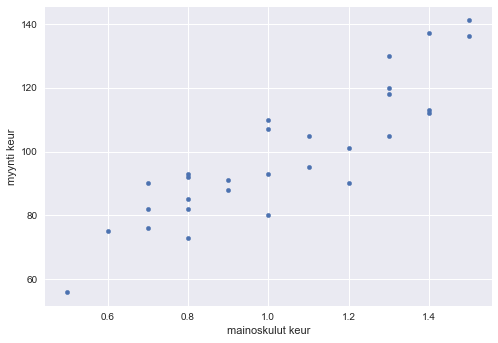

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://bit.ly/2UuPwcV')
print(df.head())
df.plot.scatter('mainoskulut keur', 'myynti keur')
plt.show()

Lineeaarinen malli riippuvuudelle saadaan tuomalla **sklearn.lineal_model** -kirjastosta **LinearRegression** -luokka ja antamalla sille selittäväksi muuttujaksi mainoskulut ja selittäväksi muuttujaksi myynti.

Pelkkää `df['mainoskulut keur']` -Seriesiä ei voi kuitenkaan tuoda x:nä, sillä selittävän muuttujan pitää olla DataFrame, siksi muutetaan se `to_frame`-metodilla.

`fit`-sovitus antaa tulosteena mallin lähtötiedot (joita voisi säätää, jos tuntee käytettävän mallin):

In [18]:
from sklearn.linear_model import LinearRegression
malli=LinearRegression()
x = df['mainoskulut keur'].to_frame()  # muutetaan DataFrameksi
y = df['myynti keur']
malli.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

`fit`-sovituksen jälkeen malli-olio sisältää mallin parametrit `coef_`- ja `intercept`-kentissä:

In [21]:
print(malli.coef_)  # kulmakerroin
print(malli.intercept_) # vakiotermi

[ 64.5961711]
32.3487885133


Kulmakerroin tulee listamuodossa (array), koska mallissa voisi olla useampia selittäviä muuttujia ja näin ollen myös useampia kulmakertoimia. Tässä mallina on siis suora, jonka yhtälö on  **y = 64,596x + 32,349**

Mallin mukaan siis yhden keur lisäys mainoskuluissa lisää myyntiä 64,596 keur.

Selityskerroin saadaan komennolla `malli.score(x,y)`, selityskerroinhan on korrelaatiokertoimen neliö

In [24]:
print(malli.score(x,y))
# toisaalta
print(df['mainoskulut keur'].corr(df['myynti keur'])**2)

0.787624300218
0.787624300218


Tässä siis 78,7 % myynnin varianssista voidaan selittää mainoskuluilla.

Mallin `predict`-metodilla voidaan ennustaa mallin mukaisia y:n arvoja annetuille x:lle, ja tätä voidaan käyttää myös regressiosuoran piirtämiseen hajontakaavioon. Sama saataisiin myös laskemalla y:t regressiosuoran yhtälöllä  y = 64,596x + 32,349 mutta `predict` tekee sen automaattisesti.

[  87.25553395  106.63438528]


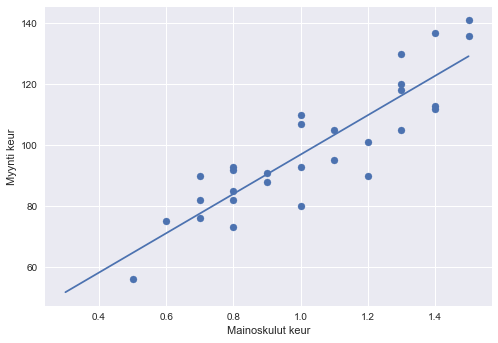

In [42]:
print(malli.predict([[0.85],[1.15]])) # mainoskuluja 0,85 ja 1,15 vastaavat myynnit 

import numpy  as np

xfit = np.linspace(0.3,1.5,100) #100 arvoa tasavälein väliltä 0.3-1.5
Xfit = pd.DataFrame(xfit)
yfit = malli.predict(Xfit)
plt.scatter(x,y)
plt.plot(xfit,yfit)
plt.xlabel('Mainoskulut keur')
plt.ylabel('Myynti keur')
plt.show()

Toki voidaan laskea ennusteet kaikille aineiston x-arvoille, ja tehdä kaavio aineiston y-arvoista ja ennusteista:

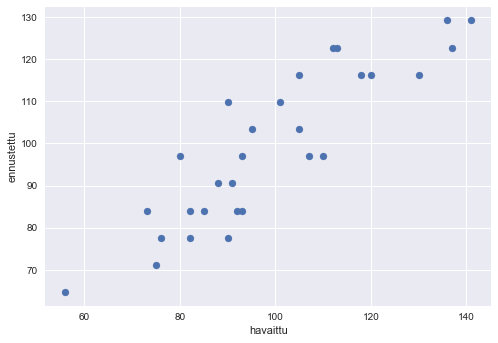

In [44]:
ennusteet = malli.predict(x)
plt.scatter(y, ennusteet)

plt.xlabel('havaittu')
plt.ylabel('ennustettu')
plt.show()

<a id="2"></a>
### Usean selittävän muuttujan regressio 
Lineaarinen regressio voidaan määrittää myös käyttäen useammampaa selittävää muuttujaa. Tällöin haetaan pienimmän neliösumman menetelmällä parametrit kaavaan  
![kaava](http://student.labranet.jamk.fi/~varpe/datananalk2019/kerta8/kaava.png)

Tämä saadaan määritettyä scikit-learn-kirjastolla vastaavalla tavalla antamalla LinearRegression-oliolle selittäviksi muuttujiksi useampia sarakkeita sisältävä DataFrame.

Esimerkissä (kuvitteellisia) kesämökkien hintoja mallinnetaan rantaviivan pituuden, pinta-alan ja sähkön (0/1) perusteella. 

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression



df = pd.read_csv('https://bit.ly/2CeUELc')
print(df.head())

x = df[['ranta_m','pinta-ala_m2','sähkö']]
y = df['hinta_ke']

malli=LinearRegression()
malli.fit(x,y)

print('Selityskerroin:',malli.score(x,y)) 



# vakiotermi ja kulmakertoimet
print('vakiotermi:',malli.intercept_)
print('kulmakertoimet:',malli.coef_)

   nro  ranta_m  pinta-ala_m2  sähkö  hinta_ke
0    1       30            50      0        95
1    2       35            42      0        95
2    3       40            25      1        80
3    4       50            30      1       100
4    5       55            45      0       135
Selityskerroin: 0.883468562001
vakiotermi: -85.844696481
kulmakertoimet: [  1.90510961   2.60786899  23.46476406]


Mallin mukaan siis 88 % hintojen vaihtelusta selittyy selittävien muuttujien avulla. Pienimmän neliösumman virheelle antaa kaava  
hinta = -85.844... + 1.905...\*rantaviiva + 2.6078...\*ala + 23.464...\*sähkö

1 metri rantaviivaa lisää hintaa 1,905, 1 m2 pinta-alaa 2,6078 ja sähkön olemassaolo 23,464 ke.

Regressiosuoran piirtäminen ei onnistu, koska tilanne on moniulotteinen mutta voidaan kuvata havaitut ja ennustetut arvot:

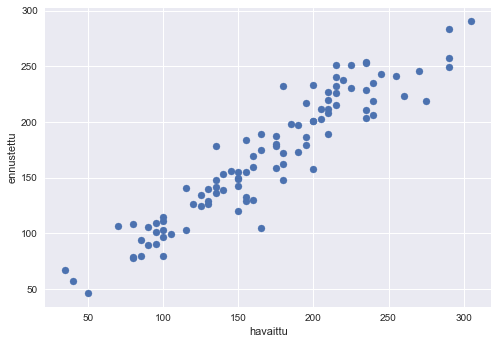

In [87]:
ennusteet = malli.predict(x)

plt.scatter(y, ennusteet)

plt.xlabel('havaittu')
plt.ylabel('ennustettu')
plt.show()


Kaaviona voidaan esittää myös mallin ennusteen ja toteutuman erot, tästä nähdään onko virhe satunnaista:

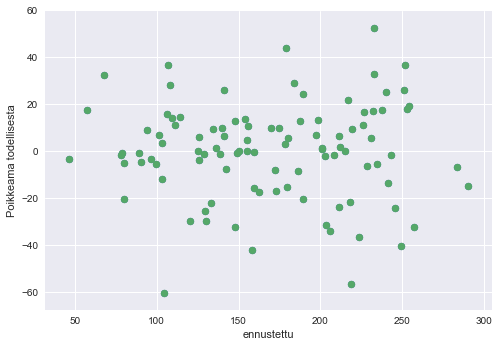

In [54]:
plt.scatter(malli.predict(x), malli.predict(x)-y)
plt.xlabel('ennustettu')
plt.ylabel('Poikkeama todellisesta')
plt.show()

<a id="3"></a>
## Koneoppiminen
Lineaarinen regressio on yksi malli **koneoppimisesta**, jossa pyritään olemassaolevan datan avulla ennustamaan "uusien havaintojen" y:n arvoja. Tässä, kuten muissakin koneoppimisen malleissa, tulee vastaan muutamia käsitteitä/vaiheita:

<a id="4"></a>
### Puuttuvien arvojen käsittely
scikit-learn ja statsmodel-kirjastoille ei yleensä voi antaa dataa jossa on puuttuvia arvoja (missing values).

Datassa olevien puuttuvien arvojen määrän saa pandasissa `isnull().sum()`


In [55]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset('titanic')
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Usein tyhjät arvot korvataan ko. kentän mediaanilla

In [57]:
korvaava = df['age'].median()

df['age'].fillna(korvaava, inplace=True)

df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<a id="5"></a>
### Tekstikentät numeerisiksi
Lineaariesta regeressiota (eikä monia muitakaan koneoppimismalleja) voidä käytää tekstimuotoiseen dataan, vaan kaikki käytettävät kentät pitää olla numeerisia. 

Esim. jos datassa on kenttä viikonpäivä tekstinä (maanantai, tiistai jne) voidaan tätä käyttää lineaarisessa regressiossa jos kenttä saadaan numeeriseksi 0,1,2... (tai 1,2,3...)

Tähän on useita keinoja:

pandasin `map`-metodilla voidaan antaa uudet arvot
`df['paiva'].map({'maanantai': 0, 'tiistai': 1, #jne })`



In [61]:
import pandas as pd

df = pd.read_csv('https://student.labranet.jamk.fi/~varpe/datananalk2019/kerta8/esim3.txt')
print(df.head())
df['paivanro'] =  df['paiva'].map({'maanantai': 0, 'tiistai': 1, 'keskiviikko': 2, 'torstai': 3, 'perjantai': 4, 'lauantai': 5, 'sunnuntai':6})
print(df.head())


       paiva        arvo
0    torstai  107.623820
1  maanantai   99.557211
2   lauantai  108.502577
3  sunnuntai  112.186754
4  perjantai  116.402182
       paiva        arvo  paivanro
0    torstai  107.623820         3
1  maanantai   99.557211         0
2   lauantai  108.502577         5
3  sunnuntai  112.186754         6
4  perjantai  116.402182         4


scikit-learn -kirjastossa on preprocessing.LabelEncoder -luokka joka tekee tämän automaattisesti

In [67]:
import pandas as pd

df = pd.read_csv('https://student.labranet.jamk.fi/~varpe/datananalk2019/kerta8/esim3.txt')
print(df.head())

from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

df['paivanro'] = labelencoder.fit_transform(df['paiva'])

print(df.head())

print(labelencoder.inverse_transform([0,1,2])) # muunnos toiseen suuntaan

       paiva        arvo
0    torstai  107.623820
1  maanantai   99.557211
2   lauantai  108.502577
3  sunnuntai  112.186754
4  perjantai  116.402182
       paiva        arvo  paivanro
0    torstai  107.623820         6
1  maanantai   99.557211         2
2   lauantai  108.502577         1
3  sunnuntai  112.186754         4
4  perjantai  116.402182         3
['keskiviikko' 'lauantai' 'maanantai']


LabelEncoder:n käytössä on kuitenkin pari ongelmaa: numerot tulevat luokille aakkosjärjetyksessä eikä sille voi (helposti) määrittää haluttua järjestystä. 

Se sopisikin vain tilanteisiin joissa luokkien välillä ei ole mielekästä järjestystä, esim. valtio-kenttään.

Mutta jos luokkien välillä ei ole mielekästä järjestystä, ei tällaisia lukuja voi myöskään käyttää regerssiossa.
Esim. maa alla olevassa datassa voitaisiin koodata 1,2,3,4 mutta näille ei ole mielekästä järjestystä.

In [63]:
df = pd.read_csv('https://student.labranet.jamk.fi/~varpe/datananalk2019/kerta8/esim4.txt')
print(df.head())

      maa       arvo1  arvo2
0  Ruotsi  106.393696      8
1   Suomi  107.115620      3
2   Norja   97.819197      4
3  Ruotsi  104.838592      3
4   Suomi  103.141195      8


Tällaisen datan käyttö numeerisena on mahdollista ns. **one-hot-encoding** -menetelmän avulla (käytetään myös termiä dummy encoding).  Siinä jokaisesta kentästä löytyvästä arvosta tehdään uusi kenttä, jossa arvot ovat 0 tai 1.

Tähän voi käyttää pandasin `get_dummies` -metodia:

In [83]:
df = pd.read_csv('https://student.labranet.jamk.fi/~varpe/datananalk2019/kerta8/esim4.txt')
dummies = pd.get_dummies(df['maa'], prefix='onmaa')

df = df.join(dummies).drop('maa', axis=1)

print(df.head())

        arvo1  arvo2  onmaa_Norja  onmaa_Ruotsi  onmaa_Suomi  onmaa_Tanska
0  106.393696      8            0             1            0             0
1  107.115620      3            0             0            1             0
2   97.819197      4            0             0            1             0
3  104.838592      3            0             1            0             0
4  103.141195      8            0             0            0             1


(saman voisi tehdä myös scikit-learnin OneHotEncoder-luokalla).

Kaksiluokkaisen muuttujan (esim sukupuoli) voi esittää yhdellä numerolla (0/1 tai 1/2), vaikka luokille ei olisikaan mielekästä järjestystä. Ei ole mielekästä tehdä erikseen kenttiä onMies ja onNainen arvoilla 0/1, koska nämä riippuvat toisistaan suoraan. Niinpä riittää jompikumpi kentistä, tai sitten vain sukupuoli (mies=0, nainen=1), olettaen että tässä ei ole muita mahdollisuuksia. 

True/False -arvoja sisältävän kentän saa 0/1:ksi yksinkertaisesti `df['onko'].astype(int)`

Lineaarista regressiota ei voi laskea jos selittävissä muuttuujista kaksi riippuvat toisistaan lineaarisesti, esim. sama arvo eri yksiköissä tai onMies/onNainen.


<a id="6"></a>
### Jako opetus- ja testidataan
Usein koneoppimisessa käytettävä data jaetaan kahteen osaan, opetus- ja testidataan. Lineaarisen regression tapauksessa parametrit (vakiotermi ja kulmakertoimet) määritetään testidata-aineiston avulla ja saatua mallia testataan testidataan, eli `score()` lasketaan testidatasta (jota ei ole käytetty mallin luontiin).

Jakoa ei voi tehdä manuaalisesti tyyliin "60% riveistä datan alusta opetukseen, loput testiin", koska tällöin jaossa voi tulla vääristymiä (tietyntyyppiset tietueet voivat olla alussa/lopussa).

Satunnaisesti tapahtuvaan jakoon käytetään yleensä scikit-learnin `model_selection.train_test_split` -luokkaa.

In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split 

df = pd.read_csv('https://bit.ly/2CeUELc')

x = df[['ranta_m','pinta-ala_m2','sähkö']]
y = df['hinta_ke']

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.3, random_state = 15)

print(xTrain.shape)
print(xTest.shape)                                             

(70, 3)
(30, 3)


`test_size = 0.3` määrittää että 30% riveistä menee testidataan (loput opetusdataan). `random_state = 15` alustaa satunnaislukugeneraattorin ja antamalla eri kerroilla saman luvun, saadaan aina sama jako.


In [82]:
from sklearn.linear_model import LinearRegression

malli=LinearRegression()

# tehdään malli opetusdatalla
malli.fit(xTrain,yTrain)

# testataan testidatalla
print('Selityskerroin:',malli.score(xTest,yTest)) 

Selityskerroin: 0.899211020244


<a id="7"></a>
### Muuttujien muunnokset
Määrällisten muuttujiev välillä voi olla riippuvuus, vaikka se ei olisikaan lienaarista. Tällöinkin voidaan käyttää lineaarista regressiota tekemällä muuttujille matemaattisia muunnoksia eli jos y = k\*x^2  voidaan selittäväksi muuttujaksi ottaa x:n sijaan x^2. Muunnoksena voi olla myös logaritmi tai neliöjuuri.

Esim. käytettäessä henkilön vuosituloja selittävänä muuttujana 10000 euron lisäys vaikuttaa varmaan eri tavalla tulojen kasvaessa 20 000->30 000 kuin 200 000->210 000.

Yhden selittävän muuttujan tapauksessa sopiva muunnos nähdään usein suoraan hajontakaaviosta:

Ohessa taulukko kertoo kuinka suuri osa asioista on muistettu x tunnin päästä.


   time  prop
0     1  0.84
1     5  0.71
2    15  0.61
3    30  0.56
4    60  0.54


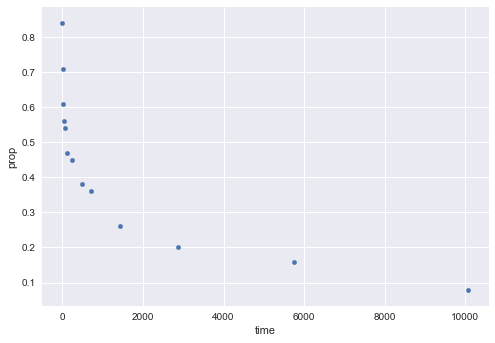

score: 0.57085844687


In [109]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://student.labranet.jamk.fi/~varpe/datananalk2019/kerta8/esim5.txt')
print((df.head()))

df.plot.scatter('time', 'prop')
plt.show()

from sklearn.linear_model import LinearRegression

x = df['time'].to_frame()
y = df['prop']

malli=LinearRegression()
malli.fit(x,y)
print('score:', malli.score(x,y))

Selvästikään riippuvuus ei ole lineaarista. Se voisi olla eksponetiaalista, josta saadaan lineaarinen riippuvuus logaritmisella muunnoksella.

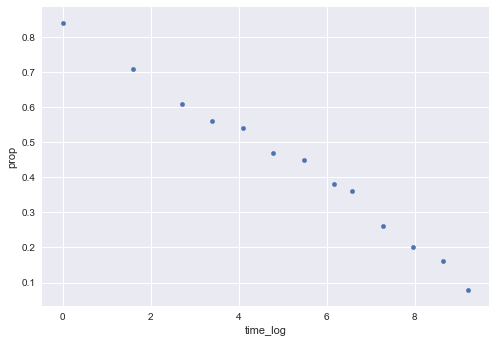

score: 0.989877643664


In [108]:
import numpy as np
df['time_log'] = np.log(df['time'])

df.plot.scatter('time_log', 'prop')
plt.show()

x = df['time_log'].to_frame()
y = df['prop']

malli=LinearRegression()
malli.fit(x,y)
print('score:', malli.score(x,y))



Usean selittävän muuttujan tapauksessa sopivien muunnosten päättely voi olla selvästi vaikeampaa. Jokaisen muuttujan osalta voidaan tehdä oma hajontakaavio, mutta tästä ei nähdä mahdollisia muuttujien yhteisvaikutuksia. 

scikit-learn-kirjaston `preprocessing.PolynomialFeatures`-luokka mahdollistaa eriasteisten polynomisovitusten tekemisen automaattisesti.

<a id="8"></a>
### Muuttujien valinta

Jos datassa on paljon kenttiä, voi olla järkevää etsiä lineaariseen regressiomalliin selittäviksi muuttujiksi vain tärkeimmät. Karsintaa voi tehdä esim korrelaatiokertoimien avulla `df.corrwith(df['y'])`. Myös seabornin pairplot on käyttökelpoinen muuttujien valinnassa.

On myös huomioitava että välttämättä jonkun muuttujan heikko korrelaatio ei tarkoita etteikö sillä olisi vaikutusta: voi olla että jonkun muun muuttujan vaikutus on paljon suurempi mutta silti toisetkin muuttujat vaikuttavat. Esim sähköliittymä voi aina lisätä mökin hintaa 20000 e:lla mutta ei korreloi suoraan hintaan, joka riippuu voimakkaammin mökin koosta. Tällöin koko+sähkö -kombinaatio selittävät hinnan kuitenkin paremmin kuin pelkkä koko.
